In [8]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8") # principlamente para mostrar tildes en las gráficas

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

In [12]:
library(ISLR)
library(dplyr)
library(glmnet)
library(caret)
library(ggplot2)
data("Hitters")

Hitters_clean <- na.omit(Hitters)
if (sum(is.na(Hitters_clean)) > 0) {
    warning("Existen valores NA en el dataset !")
}

Hitters_clean <- Hitters_clean %>% select(-League, -Division, -NewLeague) # select(Hitters_clean, -League, -Division, -NewLeague)

Hitters_clean

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.000
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,70.000
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,100.000
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,75.000
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,1100.000


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
hittersTrain <- Hitters_clean[1:200, ]
hittersTest <- Hitters_clean[201:263, ]


Call:
lm(formula = hittersTrain$Salary ~ ., data = hittersTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-724.32 -176.70  -42.04  125.87 1908.21 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 106.52986   95.31314   1.118 0.265168    
AtBat        -3.00777    0.81304  -3.699 0.000286 ***
Hits         10.55360    2.89035   3.651 0.000340 ***
HmRun        -2.40115    7.14065  -0.336 0.737057    
Runs         -1.62995    3.55361  -0.459 0.647013    
RBI           0.19677    3.00943   0.065 0.947941    
Walks         6.42207    2.09161   3.070 0.002463 ** 
Years         1.46558   13.70138   0.107 0.914933    
CAtBat       -0.15985    0.15083  -1.060 0.290631    
CHits        -0.37617    0.75375  -0.499 0.618337    
CHmRun        0.29513    1.84025   0.160 0.872762    
CRuns         2.10611    0.85595   2.461 0.014800 *  
CRBI          1.00458    0.77352   1.299 0.195676    
CWalks       -0.87361    0.37143  -2.352 0.019735 *  
PutOuts       0

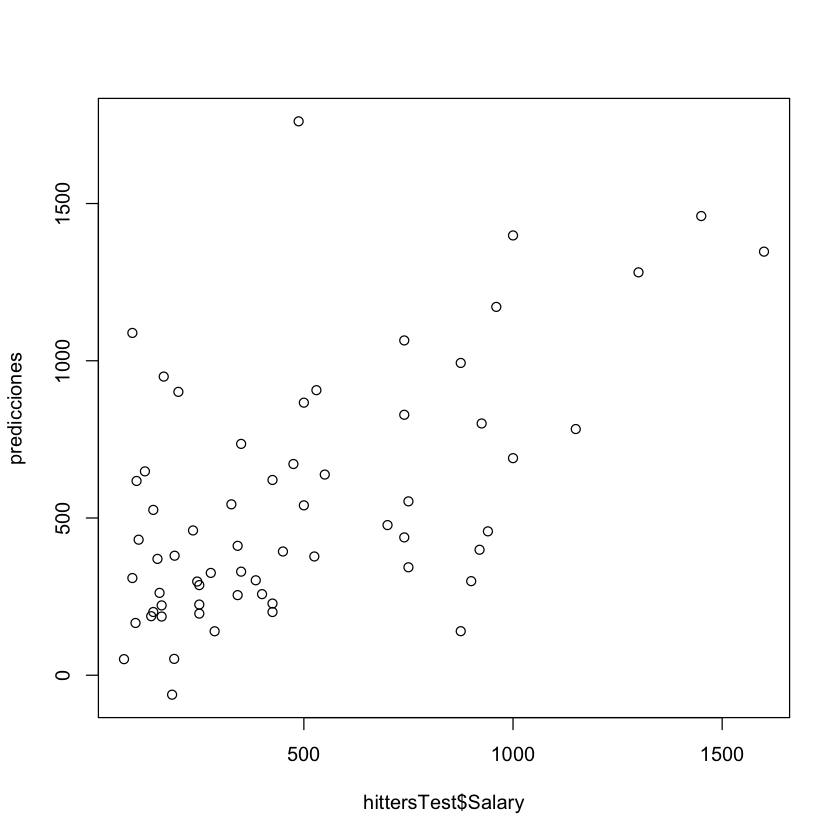

In [150]:
modelo_lm <- lm(hittersTrain$Salary ~ ., data = hittersTrain)
summary(modelo_lm)

predicciones <- predict(modelo_lm, newdata = hittersTest)

plot(hittersTest$Salary, predicciones)

In [ ]:
# Residuos
residuos_lm <- hittersTest$Salary - predicciones
# Suma de Residuos al Cuadrado
sum(residuos_lm^2)

# MSE
mean(residuos_lm^2)

[1] 7955019

[1] 126270.1

### Ridge

In [152]:
x_train <- hittersTrain %>% select(-Salary)
y_train <- hittersTrain$Salary

x_test <- hittersTest %>% select(-Salary)
y_test <- hittersTest$Salary

In [153]:
lam = seq(0, 10, by = 0.01)
# validacion cruzada de k-iteraciones (por defecto k = 10)
cvout_rg <- cv.glmnet(as.matrix(x_train), y_train, alpha = 0, lambda = lam)
cvout_rg$lambda.min

[1] 2.46

In [154]:
predicciones_rg <- predict(cvout_rg, newx = as.matrix(x_test), type = "response", s = cvout_rg$lambda.min)

[1] 7542058

[1] 119715.2

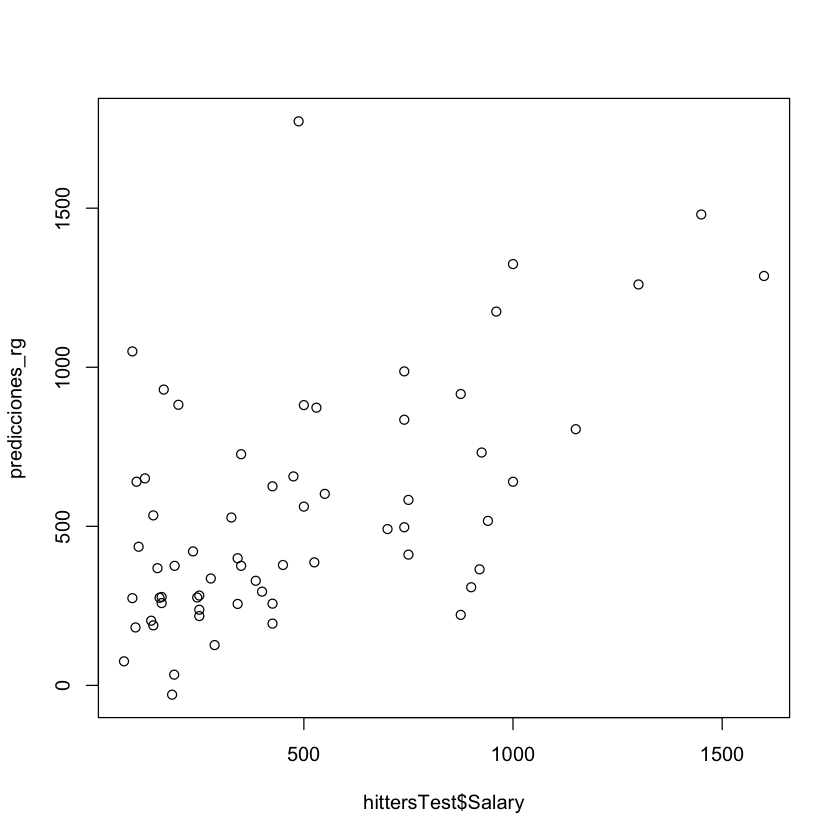

In [155]:
# Residuos
residuos_rg <- hittersTest$Salary - predicciones_rg
# Suma de Residuos al Cuadrado
sum(residuos_rg^2)
# MSE
mean(residuos_rg^2)

plot(hittersTest$Salary, predicciones_rg)

In [ ]:
lam = seq(0, 10, by = 0.01)
# validacion cruzada de k-iteraciones (por defecto k = 10)
cvout_la <- cv.glmnet(as.matrix(x_train), y_train, alpha = 1, lambda = lam)
cvout_la$lambda.min
predicciones_la <- predict(cvout_la, newx = as.matrix(x_test), type = "response", s = cvout_la$lambda.min)

[1] 7609429

[1] 120784.6

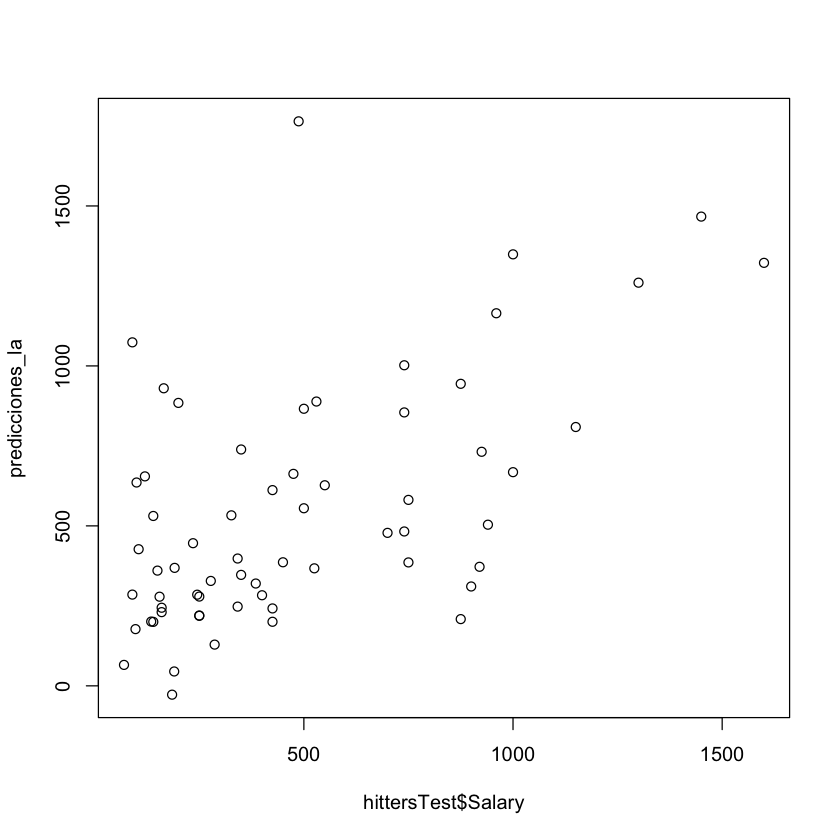

In [169]:
# Residuos
residuos_la <- hittersTest$Salary - predicciones_la
# Suma de Residuos al Cuadrado
sum(residuos_la^2)
# MSE
mean(residuos_la^2)

plot(hittersTest$Salary, predicciones_la)